In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [45]:
data = pd.read_csv('./datasets/WASSA22_23_hope.tsv', sep='\t')
data['emotion'] = data['emotion'].str.lower()
data

,empathy,distress,essay,emotion,gender,education,race,age,income,personality_conscientiousness,...,iri_fantasy,iri_empathatic_concern,fear,sadness,disgust,surprise,anger,neutral,hope,joy
0,5.667000,4.375,it is really diheartening to read about these ...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.429,4.000,0,1,0,0,0,0,0,0
1,4.833000,4.875,the phone lines from the suicide prevention li...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.429,4.000,0,1,0,0,0,0,0,0
2,5.333000,3.500,"no matter what your heritage, you should be ab...",neutral,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.429,4.000,0,0,0,0,0,1,0,0
3,4.167000,5.250,it is frightening to learn about all these sha...,fear,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.429,4.000,1,0,0,0,0,0,0,0
4,5.333000,4.625,the eldest generation of russians aren't being...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.429,4.000,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,2.333333,2.750,The entirety of this situation is cause for al...,fear/hope,2.0,7.0,1.0,38.0,42000.0,7.00,...,2.571,3.857,1,0,0,0,0,0,1,0
2271,2.333333,2.750,This entire circumstance is deeply concerning....,fear/hope,2.0,7.0,1.0,38.0,42000.0,7.00,...,2.571,3.857,1,0,0,0,0,0,1,0
2272,1.000000,2.000,"The article is deeply unsettling, and my since...",anger/hope,1.0,6.0,1.0,29.0,85000.0,6.75,...,4.143,4.643,0,0,0,0,1,0,1,0
2273,1.000000,2.000,"This article is incredibly distressing, and I ...",anger/hope,1.0,6.0,1.0,29.0,85000.0,6.75,...,4.143,4.643,0,0,0,0,1,0,1,0


In [46]:
emotions = []
for perceived_emotion in data['emotion'].unique():
	for emotion in perceived_emotion.split('/'):
		if emotion not in emotions:
			emotions.append(emotion)
for emotion in emotions:
	data[emotion] = data["emotion"].str.lower().str.contains(emotion).astype(int)

In [47]:
def plot_emotions_distribution(data):
	_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

	data['emotion'].value_counts().plot(
		kind='bar',
		xlabel='Emotion',
		ylabel='Number of essays',
		ax=ax1
	)

	data[emotions].sum().sort_values(ascending=False).plot(
		kind='bar',
		xlabel='Emotion',
		ylabel='Number of essays',
		ax=ax2
		)

	plt.plot()

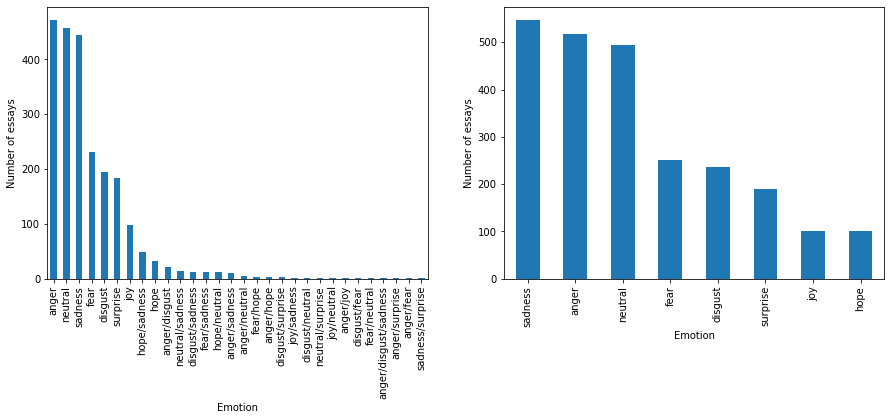

In [48]:
plot_emotions_distribution(data)

In [49]:
cond_to_double = (data['sadness']==0) & (data['neutral']==0) & (data['anger']==0) # raddoppia anche hope
to_double = data[cond_to_double]
not_to_double = data[~cond_to_double]
doubled = pd.concat([to_double]*2, ignore_index=True)
new_data = pd.concat([not_to_double, doubled], ignore_index=True)

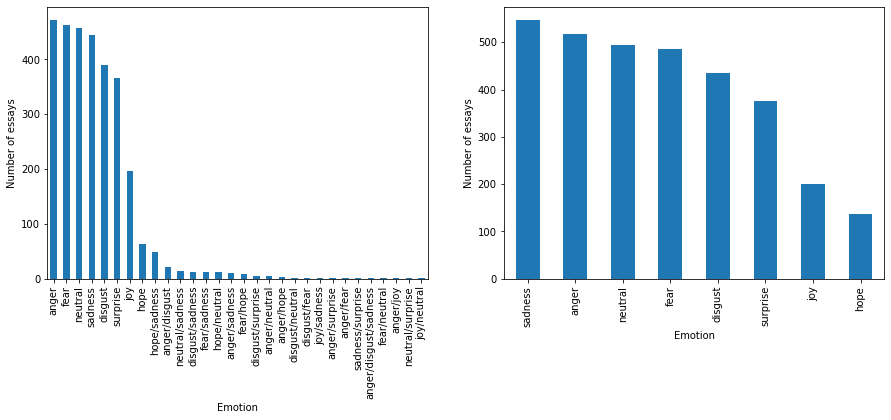

In [50]:
plot_emotions_distribution(new_data)

In [6]:
def upsample(data, class_label_to_upsample, n_samples):
    '''
    This function resamples the class label passed as parameter and returns the
    upsampled data set.

    :param data: the data set to upsample
    :param class_label_to_upsample: the class label to upsample
    :param n_samples: the number of samples to upsample to
    '''
    
    data_to_upsample = data[data[class_label_to_upsample] == 1]
    other_data = data[data[class_label_to_upsample] != 1]
    upsampled_data = resample(
        data_to_upsample,
        replace=True,
        n_samples=n_samples,
        random_state=42
        )
    new_data = pd.concat([upsampled_data, other_data])
    return new_data